# Projeto Final - Fifa 18 More Complete Player Dataset

In [108]:
#importar todas as bibliotecas necessárias

import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math as math
from scipy import stats
import statsmodels.api as sm
from scipy.stats import uniform, expon, norm, probplot, percentileofscore, t

In [83]:
#rodar o dataset

fifa = pd.read_csv("CompleteDataset.csv")

C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Análise exploratória

In [84]:
fifa.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [85]:
#remover itens que não serão úteis na análise

fifa_limpo = fifa.drop(columns=['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'])

In [86]:
fifa_limpo.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143,79,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,1458,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096,93,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,2165,60,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,1961,78,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


# Estatísticas descritivas

In [87]:
fifa_limpo.describe()

,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [88]:
def troca(preco):
    
    preco_limpo = []
    

    
    preco = preco.replace('€', '')

    
    preco = preco.replace('M', '')

    preco = preco.replace('K', '')
    
    
    preco = preco.int()

       
    preco_limpo.append(preco)

    return preco

In [89]:
fifa["Value"] = fifa["Value"].apply(troca)

In [92]:
fifa["Value"].head(10)

0    95.5000000
1     105000000
2     123000000
3      97000000
4      61000000
5      92000000
6    64.5000000
7    90.5000000
8      79000000
9      77000000
Name: Value, dtype: object

# Distribuição das idades dos jogadores

In [96]:
#dados básicos de idade

fifa_limpo.Age.describe()

count    17981.000000
mean        25.144541
std          4.614272
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         47.000000
Name: Age, dtype: float64

In [97]:
#média e desvio padrão mais precisos

media, dp = norm.fit(fifa.Age)

print('Média: {0}'.format(media))
print('Desvio Padrão: {0}'.format(dp))

Média: 25.144541460430453
Desvio Padrão: 4.614144033551294


In [98]:
#idade mínima e máxima

idade_min = 16
idade_max = 47

print('Idade do jogador mais jovem: {0} anos'.format(idade_min))
print('Idade do jogador mais velho: {0} anos'.format(idade_max))

Idade do jogador mais jovem: 16 anos
Idade do jogador mais velho: 47 anos


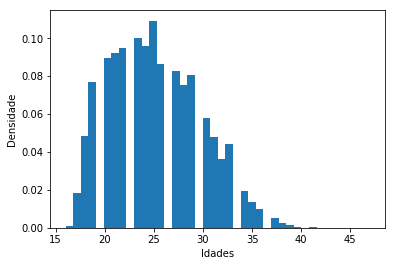

In [99]:
idades=[]
for dados_idade in fifa.Age:
    idades.append(dados_idade)
plt.hist(idades, density=True, bins= 40);
plt.ylabel('Densidade');
plt.xlabel('Idades');

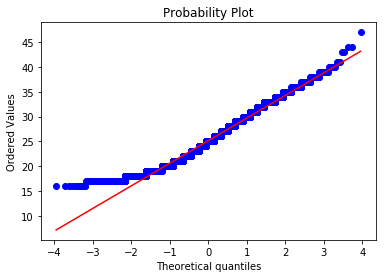

In [100]:
#Verificar graficamente se a distribuição normal é um modelo adequado para as idades dos jogadores

stats.probplot(idades, dist='norm', plot=plt);

Percebe-se que a distribuição normal pode ser considerada aceitável como modelo para as idades dos jogadores, pois grande parte dos pontos se encontram sobre a linha vermelha (diagonal). Entretanto não pode-se afirmar que é uma distribuição perfeita.

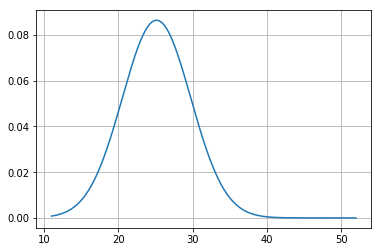

In [101]:
x = np.linspace(idade_min-5, idade_max+5, 1000)
y = norm.pdf(x, loc=media , scale=dp)
plt.plot(x, y)
plt.grid(True)
plt.show()

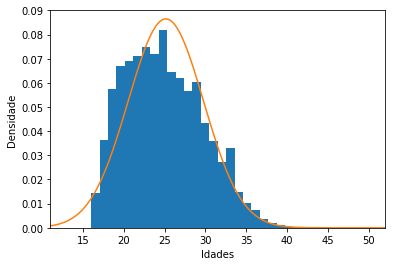

In [102]:
#plotar

plt.hist(idades, density=True, bins= 30)
plt.axis([idade_min-5, idade_max+5, 0, 0.09])
plt.ylabel('Densidade')
plt.xlabel('Idades')
plt.plot(x, y)
plt.show()

# Habilidade x Habilidades

In [113]:
player_attributes = pd.read_csv('PlayerAttributeData.csv')

C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
player_attributes.head(10)

,Unnamed: 0,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,1,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,2,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,3,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,4,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11
5,5,79,80,78,80,89,87,62,77,85,...,91,83,88,19,83,79,42,84,78,87
6,6,57,38,60,43,42,64,17,21,18,...,88,50,31,13,58,40,21,64,68,13
7,7,93,54,93,91,92,87,80,82,93,...,85,86,79,22,87,79,27,65,86,79
8,8,60,60,71,69,89,85,85,85,79,...,86,90,87,69,52,77,82,74,88,82
9,9,78,50,75,69,85,86,68,74,84,...,88,75,88,18,80,72,22,85,70,88


Escolhendo variáveis

In [115]:
print(player_attributes.columns)

Index(['Unnamed: 0', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')


In [116]:
df = DataFrame(player_attributes,columns= ['Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'])

print(df)

      Acceleration Aggression Agility Balance Ball control Composure Crossing  \
0               89         63      89      63           93        95       85   
1               92         48      90      95           95        96       77   
2               94         56      96      82           95        92       75   
3               88         78      86      60           91        83       77   
4               58         29      52      35           48        70       15   
5               79         80      78      80           89        87       62   
6               57         38      60      43           42        64       17   
7               93         54      93      91           92        87       80   
8               60         60      71      69           89        85       85   
9               78         50      75      69           85        86       68   
10              75         84      79      60           84        80       66   
11              76         6

In [117]:
corr = df.corr()

In [118]:
corr

""
